# What ratios does the government could be used to better classify schools to better prioritize those that are in need?

As an indicator, ratios are often more preferred than raw count data. One of the reasons is that raw count data often leave out important elements that could give an entirely different picture...


In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from mpl_toolkits.mplot3d import Axes3D

Import datasets for cleaning

In [2]:
#school_master dataset
school_master = pd.read_csv("Masterlist of Schools.csv")
school_master

school.id                               school.name school.region  \
0         101746                           A. Diaz, Sr. ES      Region I   
1         102193             A. P. Santos ES (SPED Center)      Region I   
2         101283                           A.P. Guevara IS      Region I   
3         100216                                Ab-Abut ES      Region I   
4         100043                                  Abaca ES      Region I   
...          ...                                       ...           ...   
46598     305308  Valeriano E. Fugoso Memorial High School           NCR   
46599     320402       Vicente Trinidad NHS (Punturin NHS)           NCR   
46600     305315               Victoriano Mapa High School           NCR   
46601     320407           Wawangpulo National High School           NCR   
46602     305465                       Western Bicutan NHS           NCR   

            school.region.name              school.province  \
0                Ilocos Region                   PANGASINAN   
1                Ilocos Region                 ILOCOS NORTE   
2                Ilocos Region                   PANGASINAN   
3                Ilocos Region                 ILOCOS NORTE   
4                Ilocos Region                 ILOCOS NORTE   
...                        ...                          ...   
46598  National Capital Region  MANILA, NCR, FIRST DISTRICT   
46599  National Capital Region           NCR THIRD DISTRICT   
46600  National Capital Region  MANILA, NCR, FIRST DISTRICT   
46601  National Capital Region           NCR THIRD DISTRICT   
46602  National Capital Region          NCR FOURTH DISTRICT   

                   school.cityhall           school.division  \
0                       PANGASINAN  Pangasinan II, Binalonan   
1                     ILOCOS NORTE                Laoag City   
2                       PANGASINAN    Pangasinan I, Lingayen   
3                     ILOCOS NORTE              Ilocos Norte   
4                     ILOCOS NORTE              Ilocos Norte   
...                            ...                       ...   
46598  MANILA, NCR, FIRST DISTRICT                    Manila   
46599           CITY OF VALENZUELA           Valenzuela City   
46600  MANILA, NCR, FIRST DISTRICT                    Manila   
46601           CITY OF VALENZUELA           Valenzuela City   
46602                  TAGUIG CITY                    Taguig   

            school.citymuni                   school.district  \
0                  BAUTISTA                          Bautista   
1      LAOAG CITY (Capital)            Laoag City District II   
2                 BAYAMBANG                      Bayambang II   
3                    PIDDIG                            Piddig   
4                    BANGUI                            Bangui   
...                     ...                               ...   
46598              SAMPALOC                        Sampaloc V   
46599    CITY OF VALENZUELA  Valenzuela City Central District   
46600            SAN MIGUEL                       Sta. Cruz V   
46601    CITY OF VALENZUELA    Valenzuela City North District   
46602           TAGUIG CITY               Taguig District III   

      school.legdistrict  ... school.mother.id  \
0           5th District  ...         101746.0   
1           1st District  ...         102193.0   
2           3rd District  ...         101283.0   
3           1st District  ...         100216.0   
4           1st District  ...         100043.0   
...                  ...  ...              ...   
46598       4th District  ...         305308.0   
46599       1st District  ...         320402.0   
46600       6th District  ...         305315.0   
46601       1st District  ...         320407.0   
46602       2nd District  ...         305465.0   

                                 school.address school.established  \
0                     Brgy. Dias Bautista, Pang           1/1/1930   
1                                    A.G. Tupa

school.id                               school.name school.region  \
0         101746                           A. Diaz, Sr. ES      Region I   
1         102193             A. P. Santos ES (SPED Center)      Region I   
2         101283                           A.P. Guevara IS      Region I   
3         100216                                Ab-Abut ES      Region I   
4         100043                                  Abaca ES      Region I   
...          ...                                       ...           ...   
46598     305308  Valeriano E. Fugoso Memorial High School           NCR   
46599     320402       Vicente Trinidad NHS (Punturin NHS)           NCR   
46600     305315               Victoriano Mapa High School           NCR   
46601     320407           Wawangpulo National High School           NCR   
46602     305465                       Western Bicutan NHS           NCR   

            school.region.name              school.province  \
0                Ilocos Region                   PANGASINAN   
1                Ilocos Region                 ILOCOS NORTE   
2                Ilocos Region                   PANGASINAN   
3                Ilocos Region                 ILOCOS NORTE   
4                Ilocos Region                 ILOCOS NORTE   
...                        ...                          ...   
46598  National Capital Region  MANILA, NCR, FIRST DISTRICT   
46599  National Capital Region           NCR THIRD DISTRICT   
46600  National Capital Region  MANILA, NCR, FIRST DISTRICT   
46601  National Capital Region           NCR THIRD DISTRICT   
46602  National Capital Region          NCR FOURTH DISTRICT   

                   school.cityhall           school.division  \
0                       PANGASINAN  Pangasinan II, Binalonan   
1                     ILOCOS NORTE                Laoag City   
2                       PANGASINAN    Pangasinan I, Lingayen   
3                     ILOCOS NORTE              Ilocos Norte   
4                     ILOCOS NORTE              Ilocos Norte   
...                            ...                       ...   
46598  MANILA, NCR, FIRST DISTRICT                    Manila   
46599           CITY OF VALENZUELA           Valenzuela City   
46600  MANILA, NCR, FIRST DISTRICT                    Manila   
46601           CITY OF VALENZUELA           Valenzuela City   
46602                  TAGUIG CITY                    Taguig   

            school.citymuni                   school.district  \
0                  BAUTISTA                          Bautista   
1      LAOAG CITY (Capital)            Laoag City District II   
2                 BAYAMBANG                      Bayambang II   
3                    PIDDIG                            Piddig   
4                    BANGUI                            Bangui   
...                     ...                               ...   
46598              SAMPALOC                        Sampaloc V   
46599    CITY OF VALENZUELA  Valenzuela City Central District   
46600            SAN MIGUEL                       Sta. Cruz V   
46601    CITY OF VALENZUELA    Valenzuela City North District   
46602           TAGUIG CITY               Taguig District III   

      school.legdistrict  ... school.mother.id  \
0           5th District  ...         101746.0   
1           1st District  ...         102193.0   
2           3rd District  ...         101283.0   
3           1st District  ...         100216.0   
4           1st District  ...         100043.0   
...                  ...  ...              ...   
46598       4th District  ...         305308.0   
46599       1st District  ...         320402.0   
46600       6th District  ...         305315.0   
46601       1st District  ...         320407.0   
46602       2nd District  ...         305465.0   

                                 school.address school.established  \
0                     Brgy. Dias Bautista, Pang           1/1/1930   
1                                    A.G. Tupa

In [3]:
#mooe dataset
mooe = pd.read_csv("MOOE data.csv")
mooe

school.id                            school.name  school.enrollment  \
0         305075                                Abra HS               2481   
1         134966                            Agtangao ES                376   
2         134967                              Bacsil ES                218   
3         134968                        Bangued East CS                443   
4         134969                       Bangued North ES                307   
...          ...                                    ...                ...   
44023     131231                    J. Hector Lacson ES                340   
44024     131233                          Kalandagan ES                420   
44025     131236                        Ma. Z. Bayya ES                481   
44026     131237  New Isabela Central Elementary School               1895   
44027     304624                           Tacurong NHS               2460   

      school.offering    school.mooe   
0           Secondary   2,182,000.00   
1          Elementary     227,000.00   
2          Elementary     144,000.00   
3          Elementary     339,000.00   
4          Elementary     178,000.00   
...               ...             ...  
44023      Elementary     180,000.00   
44024      Elementary     248,000.00   
44025      Elementary     242,000.00   
44026      Elementary     841,000.00   
44027       Secondary   2,345,000.00   

[44028 rows x 5 columns]

school.id                            school.name  school.enrollment  \
0         305075                                Abra HS               2481   
1         134966                            Agtangao ES                376   
2         134967                              Bacsil ES                218   
3         134968                        Bangued East CS                443   
4         134969                       Bangued North ES                307   
...          ...                                    ...                ...   
44023     131231                    J. Hector Lacson ES                340   
44024     131233                          Kalandagan ES                420   
44025     131236                        Ma. Z. Bayya ES                481   
44026     131237  New Isabela Central Elementary School               1895   
44027     304624                           Tacurong NHS               2460   

      school.offering    school.mooe   
0           Secondary   2,182,000.00   
1          Elementary     227,000.00   
2          Elementary     144,000.00   
3          Elementary     339,000.00   
4          Elementary     178,000.00   
...               ...             ...  
44023      Elementary     180,000.00   
44024      Elementary     248,000.00   
44025      Elementary     242,000.00   
44026      Elementary     841,000.00   
44027       Secondary   2,345,000.00   

[44028 rows x 5 columns]

In [4]:
# rooms dataset
rooms = pd.read_csv("Rooms data.csv")
rooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46412 entries, 0 to 46411
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   School ID                   46412 non-null  int64  
 1   rooms.standard.academic     46412 non-null  int64  
 2   rooms.standard.unused       46412 non-null  int64  
 3   rooms.nonstandard.academic  46408 non-null  float64
 4   rooms.nonstandard.unused    46408 non-null  float64
dtypes: float64(2), int64(3)
memory usage: 1.8 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46412 entries, 0 to 46411
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   School ID                   46412 non-null  int64  
 1   rooms.standard.academic     46412 non-null  int64  
 2   rooms.standard.unused       46412 non-null  int64  
 3   rooms.nonstandard.academic  46408 non-null  f

In [5]:
#check for duplicates
rooms[rooms["School ID"].duplicated(keep=False)]

Empty DataFrame
Columns: [School ID, rooms.standard.academic, rooms.standard.unused, rooms.nonstandard.academic, rooms.nonstandard.unused]
Index: []

Empty DataFrame
Columns: [School ID, rooms.standard.academic, rooms.standard.unused, rooms.nonstandard.academic, rooms.nonstandard.unused]
Index: []

In [6]:
# school_loc dataset
school_loc = pd.read_csv("Schools Location Data.csv", encoding="latin")
school_loc

School ID                                    School Name    Region  \
0         100001                             Apaleng-Libtong ES  Region I   
1         100002                                    Bacarra CES  Region I   
2         100003                                       Buyon ES  Region I   
3         100004                      Ganagan Elementary School  Region I   
4         100005                                     Macupit ES  Region I   
...          ...                                            ...       ...   
46619     320607                    Agripino Manalo National HS       NCR   
46620     320701             Muntinlupa National HS - NBP Annex       NCR   
46621     320702  Muntinlupa Business High School - Sucat Annex       NCR   
46622     320703               Pedro E. Diaz HS -Lakeview Annex       NCR   
46623     320704                  Muntinlupa NHS -Tunasan Annex       NCR   

                  Province        Municipality         Division  \
0             Ilocos Norte             Bacarra     Ilocos Norte   
1             Ilocos Norte             Bacarra     Ilocos Norte   
2             Ilocos Norte             Bacarra     Ilocos Norte   
3             Ilocos Norte             Bacarra     Ilocos Norte   
4             Ilocos Norte             Bacarra     Ilocos Norte   
...                    ...                 ...              ...   
46619  NCR Fourth District             Pateros           Taguig   
46620  NCR Fourth District  City of Muntinlupa  Muntinlupa City   
46621  NCR Fourth District  City of Muntinlupa  Muntinlupa City   
46622  NCR Fourth District  City of Muntinlupa  Muntinlupa City   
46623  NCR Fourth District  City of Muntinlupa  Muntinlupa City   

                          District Offering            Name of Principal  \
0                        Bacarra I       ES              Jesusa G. Laeno   
1                        Bacarra I       ES            Gene A. Reginaldo   
2                        Bacarra I       ES               Imelda C. Ilay   
3                        Bacarra I       ES  Pedestrelyn Aurora R. Acoba   
4                        Bacarra I       ES          Venchito F. Galario   
...                            ...      ...                          ...   
46619                      Pateros       SS           Cecilia G. Maramag   
46620   Muntinlupa City District I       SS         Rosendo E. Sangalang   
46621  Muntinlupa City District II       SS          Angelina B. Sagales   
46622  Muntinlupa City District II       SS           Marissa M. Andanza   
46623  Muntinlupa City District II       SS              Dean B. Hermoso   

       Enrolment   Latitude   Longitude  
0             90  18.253666  120.606180  
1            456  18.250964  120.608958  
2            167  18.234599  120.616037  
3            122  18.250014  120.587169  
4             77  18.293994  120.641019  
...          ...        ...         ...  
46619        364  14.544392  121.062078  
46620       2805  14.381522  121.031864  
46621       1529  14.441553  121.049839  
46622        575  14.391487  121.041695  
46623        809  14.392025  121.045357  

[46624 rows x 12 columns]

School ID                                    School Name    Region  \
0         100001                             Apaleng-Libtong ES  Region I   
1         100002                                    Bacarra CES  Region I   
2         100003                                       Buyon ES  Region I   
3         100004                      Ganagan Elementary School  Region I   
4         100005                                     Macupit ES  Region I   
...          ...                                            ...       ...   
46619     320607                    Agripino Manalo National HS       NCR   
46620     320701             Muntinlupa National HS - NBP Annex       NCR   
46621     320702  Muntinlupa Business High School - Sucat Annex       NCR   
46622     320703               Pedro E. Diaz HS -Lakeview Annex       NCR   
46623     320704                  Muntinlupa NHS -Tunasan Annex       NCR   

                  Province        Municipality         Division  \
0             Ilocos Norte             Bacarra     Ilocos Norte   
1             Ilocos Norte             Bacarra     Ilocos Norte   
2             Ilocos Norte             Bacarra     Ilocos Norte   
3             Ilocos Norte             Bacarra     Ilocos Norte   
4             Ilocos Norte             Bacarra     Ilocos Norte   
...                    ...                 ...              ...   
46619  NCR Fourth District             Pateros           Taguig   
46620  NCR Fourth District  City of Muntinlupa  Muntinlupa City   
46621  NCR Fourth District  City of Muntinlupa  Muntinlupa City   
46622  NCR Fourth District  City of Muntinlupa  Muntinlupa City   
46623  NCR Fourth District  City of Muntinlupa  Muntinlupa City   

                          District Offering            Name of Principal  \
0                        Bacarra I       ES              Jesusa G. Laeno   
1                        Bacarra I       ES            Gene A. Reginaldo   
2                        Bacarra I       ES               Imelda C. Ilay   
3                        Bacarra I       ES  Pedestrelyn Aurora R. Acoba   
4                        Bacarra I       ES          Venchito F. Galario   
...                            ...      ...                          ...   
46619                      Pateros       SS           Cecilia G. Maramag   
46620   Muntinlupa City District I       SS         Rosendo E. Sangalang   
46621  Muntinlupa City District II       SS          Angelina B. Sagales   
46622  Muntinlupa City District II       SS           Marissa M. Andanza   
46623  Muntinlupa City District II       SS              Dean B. Hermoso   

       Enrolment   Latitude   Longitude  
0             90  18.253666  120.606180  
1            456  18.250964  120.608958  
2            167  18.234599  120.616037  
3            122  18.250014  120.587169  
4             77  18.293994  120.641019  
...          ...        ...         ...  
46619        364  14.544392  121.062078  
46620       2805  14.381522  121.031864  
46621       1529  14.441553  121.049839  
46622        575  14.391487  121.041695  
46623        809  14.392025  121.045357  

[46624 rows x 12 columns]

In [7]:
#teachers dataset
teachers = pd.read_csv("Teachers data.csv")
teachers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45040 entries, 0 to 45039
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   school.id            45040 non-null  int64
 1   teachers.instructor  45040 non-null  int64
 2   teachers.mobile      45040 non-null  int64
 3   teachers.regular     45040 non-null  int64
 4   teachers.sped        45040 non-null  int64
dtypes: int64(5)
memory usage: 1.7 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45040 entries, 0 to 45039
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   school.id            45040 non-null  int64
 1   teachers.instructor  45040 non-null  int64
 2   teachers.mobile      45040 non-null  int64
 3   teachers.regular     45040 non-null  int64
 4   teachers.sped        45040 non-null  int64
dtypes: int64(5)
memory usage: 1.7 MB


In [8]:
#teachers check for duplicate
teachers[teachers["school.id"].duplicated(keep=False)]

Empty DataFrame
Columns: [school.id, teachers.instructor, teachers.mobile, teachers.regular, teachers.sped]
Index: []

Empty DataFrame
Columns: [school.id, teachers.instructor, teachers.mobile, teachers.regular, teachers.sped]
Index: []

In [9]:
mooe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44028 entries, 0 to 44027
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   school.id          44028 non-null  int64 
 1   school.name        44028 non-null  object
 2   school.enrollment  44028 non-null  int64 
 3   school.offering    44028 non-null  object
 4    school.mooe       44028 non-null  object
dtypes: int64(2), object(3)
memory usage: 1.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44028 entries, 0 to 44027
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   school.id          44028 non-null  int64 
 1   school.name        44028 non-null  object
 2   school.enrollment  44028 non-null  int64 
 3   school.offering    44028 non-null  object
 4    school.mooe       44028 non-null  object
dtypes: int64(2), object(3)
memory usage: 1.7+ MB


In [10]:
#check for duplicates
mooe[mooe["school.id"] . duplicated(keep=False)]

Empty DataFrame
Columns: [school.id, school.name, school.enrollment, school.offering,  school.mooe ]
Index: []

Empty DataFrame
Columns: [school.id, school.name, school.enrollment, school.offering,  school.mooe ]
Index: []

In [11]:
mooe[mooe["school.name"].duplicated(keep=False)]

school.id     school.name  school.enrollment school.offering  \
2         134967       Bacsil ES                218      Elementary   
14        134976   Sinapangan ES                385      Elementary   
15        218505    Sta. Rosa PS                 23      Elementary   
19        134980       Calaba ES                328      Elementary   
23        134984  San Antonio ES                173      Elementary   
...          ...             ...                ...             ...   
44004     131228   San Rafael ES                134      Elementary   
44005     131229         Tina ES                266      Elementary   
44008     131223    Buenaflor ES                338      Elementary   
44012     131227  San Antonio ES                174      Elementary   
44019     131238   Rajah Muda ES                454      Elementary   

       school.mooe   
2       144,000.00   
14      220,000.00   
15       49,000.00   
19      185,000.00   
23      131,000.00   
...             ...  
44004   117,000.00   
44005   157,000.00   
44008   229,000.00   
44012   122,000.00   
44019   260,000.00   

[12260 rows x 5 columns]

school.id     school.name  school.enrollment school.offering  \
2         134967       Bacsil ES                218      Elementary   
14        134976   Sinapangan ES                385      Elementary   
15        218505    Sta. Rosa PS                 23      Elementary   
19        134980       Calaba ES                328      Elementary   
23        134984  San Antonio ES                173      Elementary   
...          ...             ...                ...             ...   
44004     131228   San Rafael ES                134      Elementary   
44005     131229         Tina ES                266      Elementary   
44008     131223    Buenaflor ES                338      Elementary   
44012     131227  San Antonio ES                174      Elementary   
44019     131238   Rajah Muda ES                454      Elementary   

       school.mooe   
2       144,000.00   
14      220,000.00   
15       49,000.00   
19      185,000.00   
23      131,000.00   
...             ...  
44004   117,000.00   
44005   157,000.00   
44008   229,000.00   
44012   122,000.00   
44019   260,000.00   

[12260 rows x 5 columns]

In [12]:
#change the school.mooe from string to float
mooe[' school.mooe '] = mooe[' school.mooe '].str.replace(',','')
mooe[' school.mooe '] = mooe[' school.mooe '].astype('float')
mooe

school.id                            school.name  school.enrollment  \
0         305075                                Abra HS               2481   
1         134966                            Agtangao ES                376   
2         134967                              Bacsil ES                218   
3         134968                        Bangued East CS                443   
4         134969                       Bangued North ES                307   
...          ...                                    ...                ...   
44023     131231                    J. Hector Lacson ES                340   
44024     131233                          Kalandagan ES                420   
44025     131236                        Ma. Z. Bayya ES                481   
44026     131237  New Isabela Central Elementary School               1895   
44027     304624                           Tacurong NHS               2460   

      school.offering   school.mooe   
0           Secondary      2182000.0  
1          Elementary       227000.0  
2          Elementary       144000.0  
3          Elementary       339000.0  
4          Elementary       178000.0  
...               ...            ...  
44023      Elementary       180000.0  
44024      Elementary       248000.0  
44025      Elementary       242000.0  
44026      Elementary       841000.0  
44027       Secondary      2345000.0  

[44028 rows x 5 columns]

school.id                            school.name  school.enrollment  \
0         305075                                Abra HS               2481   
1         134966                            Agtangao ES                376   
2         134967                              Bacsil ES                218   
3         134968                        Bangued East CS                443   
4         134969                       Bangued North ES                307   
...          ...                                    ...                ...   
44023     131231                    J. Hector Lacson ES                340   
44024     131233                          Kalandagan ES                420   
44025     131236                        Ma. Z. Bayya ES                481   
44026     131237  New Isabela Central Elementary School               1895   
44027     304624                           Tacurong NHS               2460   

      school.offering   school.mooe   
0           Secondary      2182000.0  
1          Elementary       227000.0  
2          Elementary       144000.0  
3          Elementary       339000.0  
4          Elementary       178000.0  
...               ...            ...  
44023      Elementary       180000.0  
44024      Elementary       248000.0  
44025      Elementary       242000.0  
44026      Elementary       841000.0  
44027       Secondary      2345000.0  

[44028 rows x 5 columns]

In [13]:
school_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46603 entries, 0 to 46602
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   school.id               46603 non-null  int64  
 1   school.name             46603 non-null  object 
 2   school.region           46603 non-null  object 
 3   school.region.name      46603 non-null  object 
 4   school.province         46603 non-null  object 
 5   school.cityhall         46602 non-null  object 
 6   school.division         46603 non-null  object 
 7   school.citymuni         46603 non-null  object 
 8   school.district         46603 non-null  object 
 9   school.legdistrict      46603 non-null  object 
 10  school.type             46603 non-null  object 
 11  school.abbrev           18167 non-null  object 
 12  school.previousname     42221 non-null  object 
 13  school.mother.id        46596 non-null  float64
 14  school.address          44621 non-null

In [14]:
#Drop duplicates but there are no duplicates
school_master= school_master.drop_duplicates()
school_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46603 entries, 0 to 46602
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   school.id               46603 non-null  int64  
 1   school.name             46603 non-null  object 
 2   school.region           46603 non-null  object 
 3   school.region.name      46603 non-null  object 
 4   school.province         46603 non-null  object 
 5   school.cityhall         46602 non-null  object 
 6   school.division         46603 non-null  object 
 7   school.citymuni         46603 non-null  object 
 8   school.district         46603 non-null  object 
 9   school.legdistrict      46603 non-null  object 
 10  school.type             46603 non-null  object 
 11  school.abbrev           18167 non-null  object 
 12  school.previousname     42221 non-null  object 
 13  school.mother.id        46596 non-null  float64
 14  school.address          44621 non-null

In [15]:
#opening shape file
shapefile = gpd.read_file('./PH Provinces Shapefile/Provinces.shp')
shapefile.head()

ID_0  ISO       NAME_0  ID_1            NAME_1 NL_NAME_1 VARNAME_1  \
0   177  PHL  Philippines     1              Abra      None      None   
1   177  PHL  Philippines     2  Agusan del Norte      None      None   
2   177  PHL  Philippines     3    Agusan del Sur      None      None   
3   177  PHL  Philippines     4             Aklan      None      None   
4   177  PHL  Philippines     5             Albay      None      None   

                TYPE_1 ENGTYPE_1          PROVINCE  \
0  Lalawigan|Probinsya  Province              Abra   
1  Lalawigan|Probinsya  Province  Agusan del Norte   
2  Lalawigan|Probinsya  Province    Agusan del Sur   
3  Lalawigan|Probinsya  Province             Aklan   
4  Lalawigan|Probinsya  Province             Albay   

                                   REGION  \
0  Cordillera Administrative Region (CAR)   
1                    Caraga (Region XIII)   
2                    Caraga (Region XIII)   
3             Western Visayas (Region VI)   
4                 Bicol Region (Region V)   

                                            geometry  
0  POLYGON ((120.96795 17.95706, 120.97803 17.949...  
1  POLYGON ((125.57724 9.45679, 125.59687 9.45509...  
2  POLYGON ((125.91087 8.85625, 125.91461 8.85211...  
3  MULTIPOLYGON (((122.43667 11.59833, 122.43667 ...  
4  MULTIPOLYGON (((123.28764 13.04923, 123.28686 ...

ID_0  ISO       NAME_0  ID_1            NAME_1 NL_NAME_1 VARNAME_1  \
0   177  PHL  Philippines     1              Abra      None      None   
1   177  PHL  Philippines     2  Agusan del Norte      None      None   
2   177  PHL  Philippines     3    Agusan del Sur      None      None   
3   177  PHL  Philippines     4             Aklan      None      None   
4   177  PHL  Philippines     5             Albay      None      None   

                TYPE_1 ENGTYPE_1          PROVINCE  \
0  Lalawigan|Probinsya  Province              Abra   
1  Lalawigan|Probinsya  Province  Agusan del Norte   
2  Lalawigan|Probinsya  Province    Agusan del Sur   
3  Lalawigan|Probinsya  Province             Aklan   
4  Lalawigan|Probinsya  Province             Albay   

                                   REGION  \
0  Cordillera Administrative Region (CAR)   
1                    Caraga (Region XIII)   
2                    Caraga (Region XIII)   
3             Western Visayas (Region VI)   
4                 Bicol Region (Region V)   

                                            geometry  
0  POLYGON ((120.96795 17.95706, 120.97803 17.949...  
1  POLYGON ((125.57724 9.45679, 125.59687 9.45509...  
2  POLYGON ((125.91087 8.85625, 125.91461 8.85211...  
3  MULTIPOLYGON (((122.43667 11.59833, 122.43667 ...  
4  MULTIPOLYGON (((123.28764 13.04923, 123.28686 ...

In [16]:
print('schools df:\n', sorted(school_master["school.province"].unique()), '\n')
print('shapefile df:\n', sorted(shapefile["PROVINCE"].unique()))

schools df:
 ['ABRA', 'AGUSAN DEL NORTE', 'AGUSAN DEL SUR', 'AKLAN', 'ALBAY', 'ANTIQUE', 'APAYAO', 'AURORA', 'BASILAN', 'BATAAN', 'BATANES', 'BATANGAS', 'BENGUET', 'BILIRAN', 'BOHOL', 'BUKIDNON', 'BULACAN', 'CAGAYAN', 'CAMARINES NORTE', 'CAMARINES SUR', 'CAMIGUIN', 'CAPIZ', 'CATANDUANES', 'CAVITE', 'CEBU', 'CITY OF COTABATO', 'CITY OF ISABELA', 'COMPOSTELA VALLEY', 'DAVAO DEL NORTE', 'DAVAO DEL SUR', 'DAVAO ORIENTAL', 'DINAGAT ISLANDS', 'EASTERN SAMAR', 'GUIMARAS', 'IFUGAO', 'ILOCOS NORTE', 'ILOCOS SUR', 'ILOILO', 'ISABELA', 'KALINGA', 'LA UNION', 'LAGUNA', 'LANAO DEL NORTE', 'LANAO DEL SUR', 'LEYTE', 'MAGUINDANAO', 'MANILA, NCR, FIRST DISTRICT', 'MARINDUQUE', 'MASBATE', 'MISAMIS OCCIDENTAL', 'MISAMIS ORIENTAL', 'MOUNTAIN PROVINCE', 'NCR FOURTH DISTRICT', 'NCR SECOND DISTRICT', 'NCR THIRD DISTRICT', 'NEGROS OCCIDENTAL', 'NEGROS ORIENTAL', 'NORTH COTABATO', 'NORTHERN SAMAR', 'NUEVA ECIJA', 'NUEVA VIZCAYA', 'OCCIDENTAL MINDORO', 'ORIENTAL MINDORO', 'PALAWAN', 'PAMPANGA', 'PANGASINAN', 'Q

In [17]:
# Create dictionry of those with discrepancy
province_dic = {'City Of Cotabato':'Maguindanao',
 'Manila, Ncr, First District':"Metropolitan Manila",
 'Ncr Fourth District':"Metropolitan Manila",
 'Ncr Second District':"Metropolitan Manila",
 'Ncr Third District':"Metropolitan Manila",
 'Western Sama':"Samar",
 'City Of Isabela':"Basilan"}

In [18]:
# Replace province name
school_master["school.province"] = school_master["school.province"].str.title().replace(province_dic).str.replace("Del", 'del')
print(sorted(school_master["school.province"].unique()))

['Abra', 'Agusan del Norte', 'Agusan del Sur', 'Aklan', 'Albay', 'Antique', 'Apayao', 'Aurora', 'Basilan', 'Bataan', 'Batanes', 'Batangas', 'Benguet', 'Biliran', 'Bohol', 'Bukidnon', 'Bulacan', 'Cagayan', 'Camarines Norte', 'Camarines Sur', 'Camiguin', 'Capiz', 'Catanduanes', 'Cavite', 'Cebu', 'Compostela Valley', 'Davao Oriental', 'Davao del Norte', 'Davao del Sur', 'Dinagat Islands', 'Eastern Samar', 'Guimaras', 'Ifugao', 'Ilocos Norte', 'Ilocos Sur', 'Iloilo', 'Isabela', 'Kalinga', 'La Union', 'Laguna', 'Lanao del Norte', 'Lanao del Sur', 'Leyte', 'Maguindanao', 'Marinduque', 'Masbate', 'Metropolitan Manila', 'Misamis Occidental', 'Misamis Oriental', 'Mountain Province', 'Negros Occidental', 'Negros Oriental', 'North Cotabato', 'Northern Samar', 'Nueva Ecija', 'Nueva Vizcaya', 'Occidental Mindoro', 'Oriental Mindoro', 'Palawan', 'Pampanga', 'Pangasinan', 'Quezon', 'Quirino', 'Rizal', 'Romblon', 'Sarangani', 'Siquijor', 'Sorsogon', 'South Cotabato', 'Southern Leyte', 'Sultan Kudarat'

### Merging Dataframes

In [19]:
school_merged = pd.merge(school_master, mooe, on="school.id")
school_merged.shape

(44025, 27)

(44025, 27)

In [20]:
school_merged2=school_merged.merge(rooms, left_on= "school.id", right_on = "School ID", how="left")
school_merged2.shape

(44025, 32)

(44025, 32)

In [21]:
school_merged3=school_merged2.merge(teachers, left_on= "school.id", right_on = "school.id", how="left")
school_merged3.shape

(44025, 36)

(44025, 36)

In [22]:
school_merged3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44025 entries, 0 to 44024
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   school.id                   44025 non-null  int64  
 1   school.name_x               44025 non-null  object 
 2   school.region               44025 non-null  object 
 3   school.region.name          44025 non-null  object 
 4   school.province             44025 non-null  object 
 5   school.cityhall             44024 non-null  object 
 6   school.division             44025 non-null  object 
 7   school.citymuni             44025 non-null  object 
 8   school.district             44025 non-null  object 
 9   school.legdistrict          44025 non-null  object 
 10  school.type                 44025 non-null  object 
 11  school.abbrev               17461 non-null  object 
 12  school.previousname         39810 non-null  object 
 13  school.mother.id            440

## Visualization of key count data

The usual count data that people look to in schools are the number of students, number of treachers, number of rooms and the budget.
For this, we will be focusing on the following variables
 schol.mooe - The MOOE budhet of schoold
school.enrollment - for the number of students
rooms.standard.academic - this is the number of used that fit to the propper specification of DepEd, we choose this data because we would focus on the ideal setup
teachers.regular - for the number of regular teachers.

In [23]:
#drop missing values in the target columns
school_merged3=school_merged3[school_merged3['teachers.regular'].notna()]
school_merged3.info()#44025-42523

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42523 entries, 0 to 44024
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   school.id                   42523 non-null  int64  
 1   school.name_x               42523 non-null  object 
 2   school.region               42523 non-null  object 
 3   school.region.name          42523 non-null  object 
 4   school.province             42523 non-null  object 
 5   school.cityhall             42522 non-null  object 
 6   school.division             42523 non-null  object 
 7   school.citymuni             42523 non-null  object 
 8   school.district             42523 non-null  object 
 9   school.legdistrict          42523 non-null  object 
 10  school.type                 42523 non-null  object 
 11  school.abbrev               16782 non-null  object 
 12  school.previousname         38604 non-null  object 
 13  school.mother.id            425

In [24]:
#drop missing values in the target columns
school_merged3=school_merged3[school_merged3['rooms.standard.academic'].notna()]
school_merged3.info()#42523-42346

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42346 entries, 0 to 44024
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   school.id                   42346 non-null  int64  
 1   school.name_x               42346 non-null  object 
 2   school.region               42346 non-null  object 
 3   school.region.name          42346 non-null  object 
 4   school.province             42346 non-null  object 
 5   school.cityhall             42345 non-null  object 
 6   school.division             42346 non-null  object 
 7   school.citymuni             42346 non-null  object 
 8   school.district             42346 non-null  object 
 9   school.legdistrict          42346 non-null  object 
 10  school.type                 42346 non-null  object 
 11  school.abbrev               16704 non-null  object 
 12  school.previousname         38537 non-null  object 
 13  school.mother.id            423

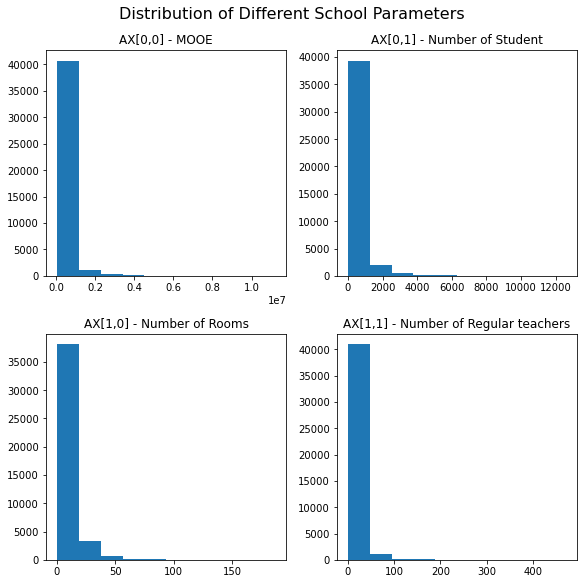

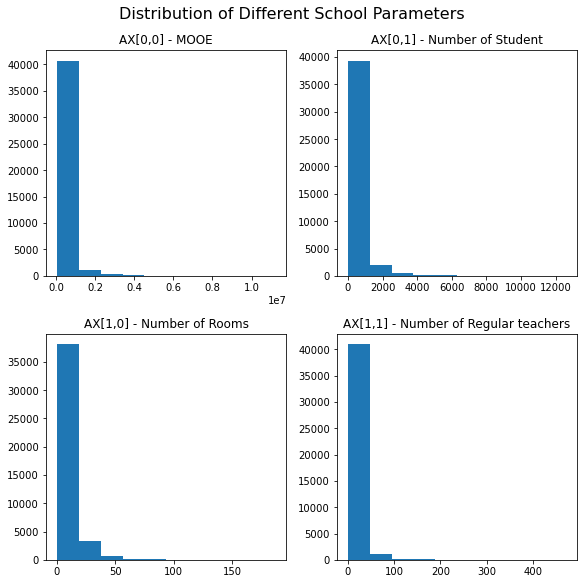

In [25]:
#first we will look into the distribution of this different count data
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8,8),  constrained_layout=True)

axes[0,0].hist(school_merged3[" school.mooe "]) 
axes[0,0].set_title("AX[0,0] - MOOE")
axes[0,1].hist(school_merged3["school.enrollment"]) 
axes[0,1].set_title('AX[0,1] - Number of Student')
axes[1,0].hist(school_merged3["rooms.standard.academic"]) 
axes[1,0].set_title('AX[1,0] - Number of Rooms')
axes[1,1].hist(school_merged3["teachers.regular"]) 
axes[1,1].set_title('AX[1,1] - Number of Regular teachers')

fig.suptitle('Distribution of Different School Parameters', fontsize=16)
plt.show()

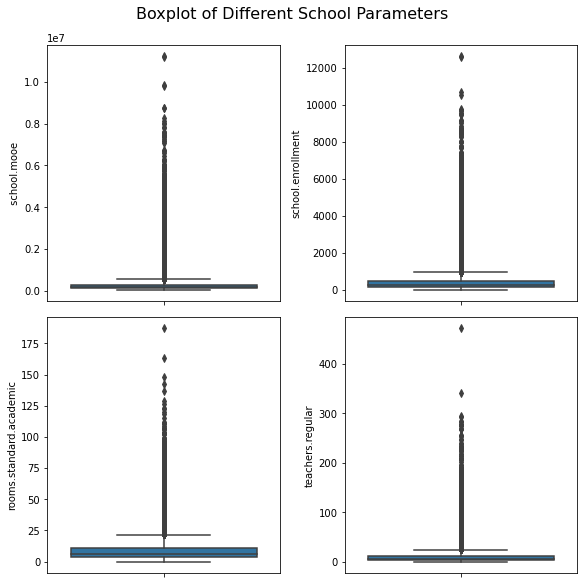

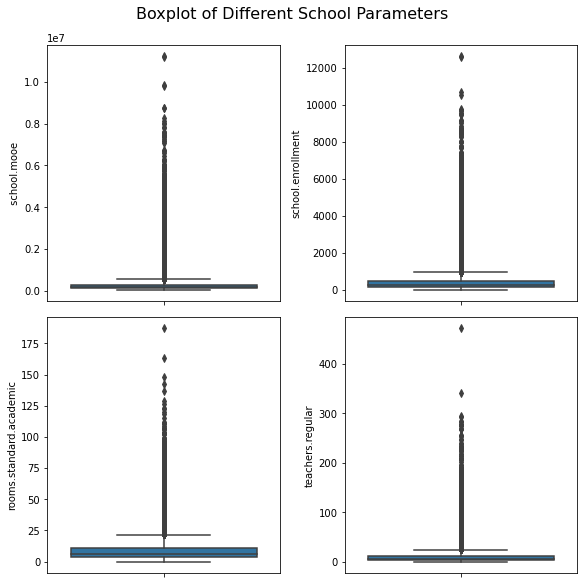

In [26]:
#first we will look into the distribution of this different count data
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8,8),  constrained_layout=True)

sns.boxplot(ax=axes[0, 0], data=school_merged3, y=' school.mooe ')
sns.boxplot(ax=axes[0, 1], data=school_merged3, y='school.enrollment')
sns.boxplot(ax=axes[1, 0], data=school_merged3, y='rooms.standard.academic')
sns.boxplot(ax=axes[1, 1], data=school_merged3, y='teachers.regular')

fig.suptitle('Boxplot of Different School Parameters', fontsize=16)
plt.show()

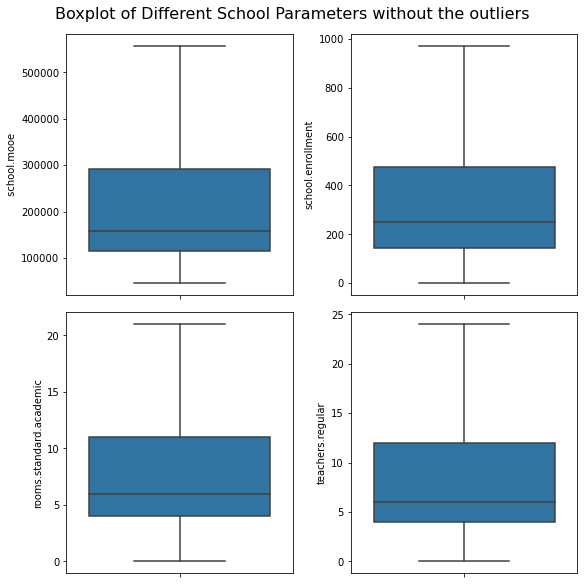

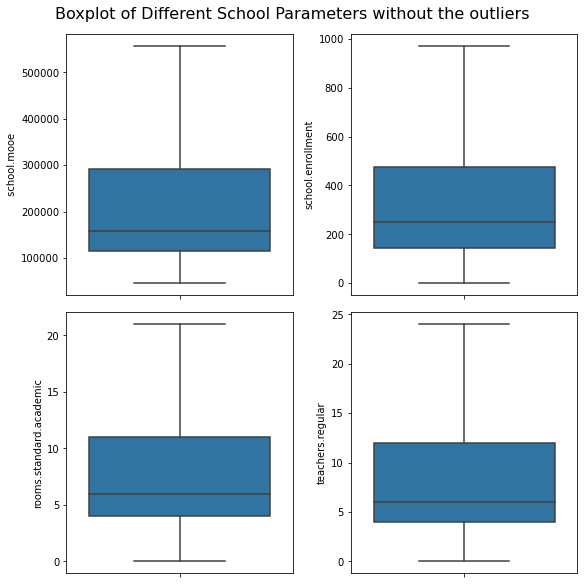

In [27]:
#first we will look into the distribution of this different count data
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8,8),  constrained_layout=True)

sns.boxplot(ax=axes[0, 0], data=school_merged3, y=' school.mooe ', showfliers = False)
sns.boxplot(ax=axes[0, 1], data=school_merged3, y='school.enrollment', showfliers = False)
sns.boxplot(ax=axes[1, 0], data=school_merged3, y='rooms.standard.academic', showfliers = False)
sns.boxplot(ax=axes[1, 1], data=school_merged3, y='teachers.regular', showfliers = False)

fig.suptitle('Boxplot of Different School Parameters without the outliers', fontsize=16)
plt.show()

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

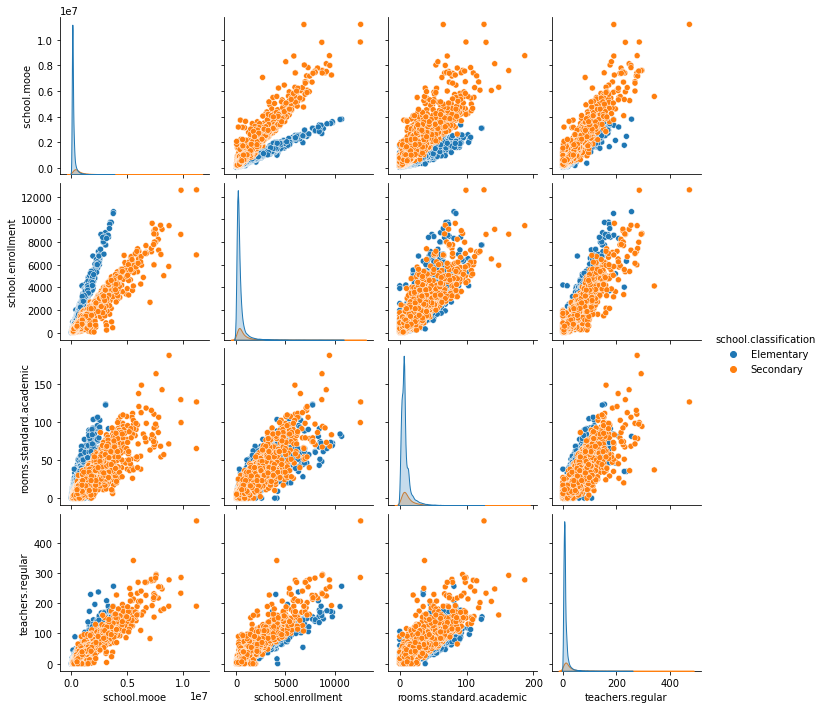

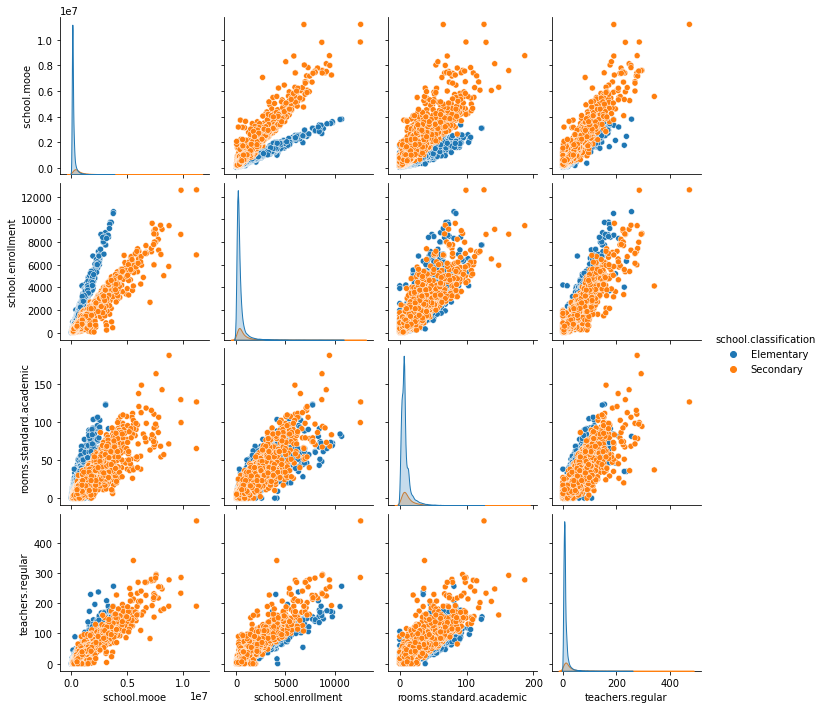

In [28]:
#pairwise scatter plot for the different variables
plt.figure(figsize=(10,8))

sns.pairplot(vars = [' school.mooe ', 'school.enrollment', 'rooms.standard.academic', 'teachers.regular'], data = school_merged3, hue='school.classification')

plt.show()

### Creating features

In [29]:
school_merged3['student.teacher']=school_merged3['school.enrollment']/school_merged3['teachers.regular']

In [30]:
school_merged3['student.rooms']=school_merged3['school.enrollment']/school_merged3['rooms.standard.academic']

In [31]:
school_merged3['mooe.student']=school_merged3[' school.mooe ']/school_merged3['school.enrollment']

In [32]:
school_merged3['mooe.teacher']=school_merged3[' school.mooe ']/school_merged3['teachers.regular']

In [33]:
school_merged3['mooe.rooms']=school_merged3[' school.mooe ']/school_merged3['rooms.standard.academic']

In [34]:
school_merged3['rooms.teacher']= school_merged3['rooms.standard.academic']/school_merged3['teachers.regular']

In [35]:
school_merged3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42346 entries, 0 to 44024
Data columns (total 42 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   school.id                   42346 non-null  int64  
 1   school.name_x               42346 non-null  object 
 2   school.region               42346 non-null  object 
 3   school.region.name          42346 non-null  object 
 4   school.province             42346 non-null  object 
 5   school.cityhall             42345 non-null  object 
 6   school.division             42346 non-null  object 
 7   school.citymuni             42346 non-null  object 
 8   school.district             42346 non-null  object 
 9   school.legdistrict          42346 non-null  object 
 10  school.type                 42346 non-null  object 
 11  school.abbrev               16704 non-null  object 
 12  school.previousname         38537 non-null  object 
 13  school.mother.id            423

In [36]:
#drop missing values in the target columns
school_merged3=school_merged3[school_merged3['rooms.teacher'].notna()]
school_merged3.info()#42523-42187

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42187 entries, 0 to 44024
Data columns (total 42 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   school.id                   42187 non-null  int64  
 1   school.name_x               42187 non-null  object 
 2   school.region               42187 non-null  object 
 3   school.region.name          42187 non-null  object 
 4   school.province             42187 non-null  object 
 5   school.cityhall             42186 non-null  object 
 6   school.division             42187 non-null  object 
 7   school.citymuni             42187 non-null  object 
 8   school.district             42187 non-null  object 
 9   school.legdistrict          42187 non-null  object 
 10  school.type                 42187 non-null  object 
 11  school.abbrev               16632 non-null  object 
 12  school.previousname         38464 non-null  object 
 13  school.mother.id            421

### Cleaning new features

In [37]:
cols = school_merged3.columns

In [38]:
school_merged3[ school_merged3[cols[36]] == np.inf].index

Int64Index([  263,   279,  1409,  2521,  2997,  3436,  3882,  3887,  5149,
             5297,
            ...
            43688, 43695, 43729, 43734, 43740, 43756, 43804, 43815, 44000,
            44009],
           dtype='int64', length=359)

Int64Index([  263,   279,  1409,  2521,  2997,  3436,  3882,  3887,  5149,
             5297,
            ...
            43688, 43695, 43729, 43734, 43740, 43756, 43804, 43815, 44000,
            44009],
           dtype='int64', length=359)

In [39]:
# drop rows with 0 teachers

school_merged3.drop( school_merged3[ school_merged3[cols[36]] == np.inf].index , inplace=True)#removed 359

In [40]:
school_merged3[ school_merged3[cols[36]] == np.inf]

Empty DataFrame
Columns: [school.id, school.name_x, school.region, school.region.name, school.province, school.cityhall, school.division, school.citymuni, school.district, school.legdistrict, school.type, school.abbrev, school.previousname, school.mother.id, school.address, school.established, school.classification, school.classification2, school.curricularclass, school.organization, school.cityincome, school.cityclass, school.urban, school.name_y, school.enrollment, school.offering,  school.mooe , School ID, rooms.standard.academic, rooms.standard.unused, rooms.nonstandard.academic, rooms.nonstandard.unused, teachers.instructor, teachers.mobile, teachers.regular, teachers.sped, student.teacher, student.rooms, mooe.student, mooe.teacher, mooe.rooms, rooms.teacher]
Index: []

[0 rows x 42 columns]

Empty DataFrame
Columns: [school.id, school.name_x, school.region, school.region.name, school.province, school.cityhall, school.division, school.citymuni, school.district, school.legdistrict, school.type, school.abbrev, school.previousname, school.mother.id, school.address, school.established, school.classification, school.classification2, school.curricularclass, school.organization, school.cityincome, school.cityclass, school.urban, school.name_y, school.enrollment, school.offering,  school.mooe , School ID, rooms.standard.academic, rooms.standard.unused, rooms.nonstandard.academic, rooms.nonstandard.unused, teachers.instructor, teachers.mobile, teachers.regular, teachers.sped, student.teacher, student.rooms, mooe.student, mooe.teacher, mooe.rooms, rooms.teacher]
Index: []

[0 rows x 42 columns]

In [41]:
school_merged3[ school_merged3[cols[37]] == np.inf].index

Int64Index([  213,   676,   919,  1088,  1091,  1114,  1521,  1689,  1692,
             2108,
            ...
            43388, 43424, 43530, 43558, 43662, 43744, 43776, 43794, 43872,
            43986],
           dtype='int64', length=555)

Int64Index([  213,   676,   919,  1088,  1091,  1114,  1521,  1689,  1692,
             2108,
            ...
            43388, 43424, 43530, 43558, 43662, 43744, 43776, 43794, 43872,
            43986],
           dtype='int64', length=555)

In [42]:
# drop rows with 0 rooms

school_merged3.drop( school_merged3[ school_merged3[cols[37]] == np.inf].index , inplace=True)#removed 555

In [43]:
school_merged3[ school_merged3[cols[38]] == np.inf]

school.id   school.name_x school.region school.region.name  \
28989     126484     Sagasaan ES      Region X  Northern Mindanao   
33740     131473  Marcos Calo ES        CARAGA             CARAGA   

        school.province   school.cityhall   school.division school.citymuni  \
28989          Bukidnon          BUKIDNON          Bukidnon        KITAOTAO   
33740  Agusan del Norte  AGUSAN DEL NORTE  Agusan del Norte      LAS NIEVES   

       school.district school.legdistrict  ... teachers.instructor  \
28989      Kitaotao II       3rd District  ...                 0.0   
33740  Las Nieves East       1st District  ...                 0.0   

      teachers.mobile teachers.regular  teachers.sped student.teacher  \
28989             0.0              4.0            0.0             0.0   
33740             0.0              5.0            0.0             0.0   

      student.rooms mooe.student mooe.teacher    mooe.rooms rooms.teacher  
28989           0.0          inf      29000.0  38666.666667          0.75  
33740           0.0          inf      31000.0  25833.333333          1.20  

[2 rows x 42 columns]

school.id   school.name_x school.region school.region.name  \
28989     126484     Sagasaan ES      Region X  Northern Mindanao   
33740     131473  Marcos Calo ES        CARAGA             CARAGA   

        school.province   school.cityhall   school.division school.citymuni  \
28989          Bukidnon          BUKIDNON          Bukidnon        KITAOTAO   
33740  Agusan del Norte  AGUSAN DEL NORTE  Agusan del Norte      LAS NIEVES   

       school.district school.legdistrict  ... teachers.instructor  \
28989      Kitaotao II       3rd District  ...                 0.0   
33740  Las Nieves East       1st District  ...                 0.0   

      teachers.mobile teachers.regular  teachers.sped student.teacher  \
28989             0.0              4.0            0.0             0.0   
33740             0.0              5.0            0.0             0.0   

      student.rooms mooe.student mooe.teacher    mooe.rooms rooms.teacher  
28989           0.0          inf      29000.0  38666.666667          0.75  
33740           0.0          inf      31000.0  25833.333333          1.20  

[2 rows x 42 columns]

In [44]:
# drop rows with 0 students

school_merged3.drop( school_merged3[ school_merged3[cols[38]] == np.inf].index , inplace=True)#removed 2

In [45]:
school_merged3[ school_merged3[cols[39]] == np.inf].index

Int64Index([], dtype='int64')

Int64Index([], dtype='int64')

In [46]:
school_merged3[ school_merged3[cols[40]] == np.inf].index

Int64Index([], dtype='int64')

Int64Index([], dtype='int64')

In [47]:
school_merged3[ school_merged3[cols[41]] == np.inf].index

Int64Index([], dtype='int64')

Int64Index([], dtype='int64')

In [48]:
school_merged3.describe()

school.id  school.mother.id  school.enrollment   school.mooe   \
count   41271.000000      41271.000000       41271.000000   4.127100e+04   
mean   146475.557292     146475.557292         469.747038   3.096662e+05   
std     66177.325590      66177.325590         713.064125   4.969116e+05   
min    100001.000000     100001.000000           3.000000   4.800000e+04   
25%    110561.500000     110561.500000         147.000000   1.160000e+05   
50%    121083.000000     121083.000000         255.000000   1.600000e+05   
75%    131808.500000     131808.500000         482.000000   2.960000e+05   
max    325106.000000     325106.000000       12613.000000   1.121800e+07   

           School ID  rooms.standard.academic  rooms.standard.unused  \
count   41271.000000             41271.000000           41271.000000   
mean   146475.557292                 9.320516               0.154709   
std     66177.325590                10.111449               0.711483   
min    100001.000000                 1.000000               0.000000   
25%    110561.500000                 4.000000               0.000000   
50%    121083.000000                 6.000000               0.000000   
75%    131808.500000                11.000000               0.000000   
max    325106.000000               187.000000              15.000000   

       rooms.nonstandard.academic  rooms.nonstandard.unused  \
count                41270.000000              41270.000000   
mean                     0.192707                  0.002956   
std                      1.038039                  0.073284   
min                      0.000000                  0.000000   
25%                      0.000000                  0.000000   
50%                      0.000000                  0.000000   
75%                      0.000000                  0.000000   
max                     74.000000                  7.000000   

       teachers.instructor  teachers.mobile  teachers.regular  teachers.sped  \
count         41271.000000     41271.000000      41271.000000   41271.000000   
mean              0.002423         1.031184         11.638317       0.047612   
std               0.102991         2.689942         17.614149       0.743137   
min               0.000000         0.000000          1.000000       0.000000   
25%               0.000000         0.000000          4.000000       0.000000   
50%               0.000000         0.000000          7.000000       0.000000   
75%               0.000000         1.000000         12.000000       0.000000   
max              10.000000       104.000000        472.000000      89.000000   

       student.teacher  student.rooms  mooe.student  mooe.teacher  \
count     41271.000000   41271.000000  41271.000000  4.127100e+04   
mean         40.897139      46.409940    823.527275  3.005212e+04   
std          19.622948      27.582431    610.252992  1.797678e+04   
min           0.875000       1.400000    172.376874  3.888889e+03   
25%          30.500000      31.818182    534.942998  2.183333e+04   
50%          38.909091      41.200000    675.126904  2.575000e+04   
75%          48.000000      53.000000    941.666667  3.350000e+04   
max        1570.000000    1223.000000  39857.142857  1.385000e+06   

          mooe.rooms  rooms.teacher  
count   41271.000000   41271.000000  
mean    34305.088308       0.978387  
std     22455.126627       0.385064  
min     10333.333333       0.041237  
25%     22000.000000       0.800000  
50%     26166.666667       1.000000  
75%     39400.000000       1.090909  
max    991000.000000      20.000000

school.id  school.mother.id  school.enrollment   school.mooe   \
count   41271.000000      41271.000000       41271.000000   4.127100e+04   
mean   146475.557292     146475.557292         469.747038   3.096662e+05   
std     66177.325590      66177.325590         713.064125   4.969116e+05   
min    100001.000000     100001.000000           3.000000   4.800000e+04   
25%    110561.500000     110561.500000         147.000000   1.160000e+05   
50%    121083.000000     121083.000000         255.000000   1.600000e+05   
75%    131808.500000     131808.500000         482.000000   2.960000e+05   
max    325106.000000     325106.000000       12613.000000   1.121800e+07   

           School ID  rooms.standard.academic  rooms.standard.unused  \
count   41271.000000             41271.000000           41271.000000   
mean   146475.557292                 9.320516               0.154709   
std     66177.325590                10.111449               0.711483   
min    100001.000000                 1.000000               0.000000   
25%    110561.500000                 4.000000               0.000000   
50%    121083.000000                 6.000000               0.000000   
75%    131808.500000                11.000000               0.000000   
max    325106.000000               187.000000              15.000000   

       rooms.nonstandard.academic  rooms.nonstandard.unused  \
count                41270.000000              41270.000000   
mean                     0.192707                  0.002956   
std                      1.038039                  0.073284   
min                      0.000000                  0.000000   
25%                      0.000000                  0.000000   
50%                      0.000000                  0.000000   
75%                      0.000000                  0.000000   
max                     74.000000                  7.000000   

       teachers.instructor  teachers.mobile  teachers.regular  teachers.sped  \
count         41271.000000     41271.000000      41271.000000   41271.000000   
mean              0.002423         1.031184         11.638317       0.047612   
std               0.102991         2.689942         17.614149       0.743137   
min               0.000000         0.000000          1.000000       0.000000   
25%               0.000000         0.000000          4.000000       0.000000   
50%               0.000000         0.000000          7.000000       0.000000   
75%               0.000000         1.000000         12.000000       0.000000   
max              10.000000       104.000000        472.000000      89.000000   

       student.teacher  student.rooms  mooe.student  mooe.teacher  \
count     41271.000000   41271.000000  41271.000000  4.127100e+04   
mean         40.897139      46.409940    823.527275  3.005212e+04   
std          19.622948      27.582431    610.252992  1.797678e+04   
min           0.875000       1.400000    172.376874  3.888889e+03   
25%          30.500000      31.818182    534.942998  2.183333e+04   
50%          38.909091      41.200000    675.126904  2.575000e+04   
75%          48.000000      53.000000    941.666667  3.350000e+04   
max        1570.000000    1223.000000  39857.142857  1.385000e+06   

          mooe.rooms  rooms.teacher  
count   41271.000000   41271.000000  
mean    34305.088308       0.978387  
std     22455.126627       0.385064  
min     10333.333333       0.041237  
25%     22000.000000       0.800000  
50%     26166.666667       1.000000  
75%     39400.000000       1.090909  
max    991000.000000      20.000000

In [49]:
school_merged3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41271 entries, 0 to 44024
Data columns (total 42 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   school.id                   41271 non-null  int64  
 1   school.name_x               41271 non-null  object 
 2   school.region               41271 non-null  object 
 3   school.region.name          41271 non-null  object 
 4   school.province             41271 non-null  object 
 5   school.cityhall             41270 non-null  object 
 6   school.division             41271 non-null  object 
 7   school.citymuni             41271 non-null  object 
 8   school.district             41271 non-null  object 
 9   school.legdistrict          41271 non-null  object 
 10  school.type                 41271 non-null  object 
 11  school.abbrev               16247 non-null  object 
 12  school.previousname         37752 non-null  object 
 13  school.mother.id            412

In [50]:
# get the target features
school_newf = school_merged3[['school.id', 'student.teacher', 'student.rooms', 'mooe.student', 'mooe.teacher', 'mooe.rooms', 'rooms.teacher']]

In [51]:
#check for missing values
school_newf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41271 entries, 0 to 44024
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school.id        41271 non-null  int64  
 1   student.teacher  41271 non-null  float64
 2   student.rooms    41271 non-null  float64
 3   mooe.student     41271 non-null  float64
 4   mooe.teacher     41271 non-null  float64
 5   mooe.rooms       41271 non-null  float64
 6   rooms.teacher    41271 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 2.5 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 41271 entries, 0 to 44024
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school.id        41271 non-null  int64  
 1   student.teacher  41271 non-null  float64
 2   student.rooms    41271 non-null  float64
 3   mooe.student     41271 non-null  float64
 4   mooe.teacher     41271 non-null  float6

## Visualization for the created feature

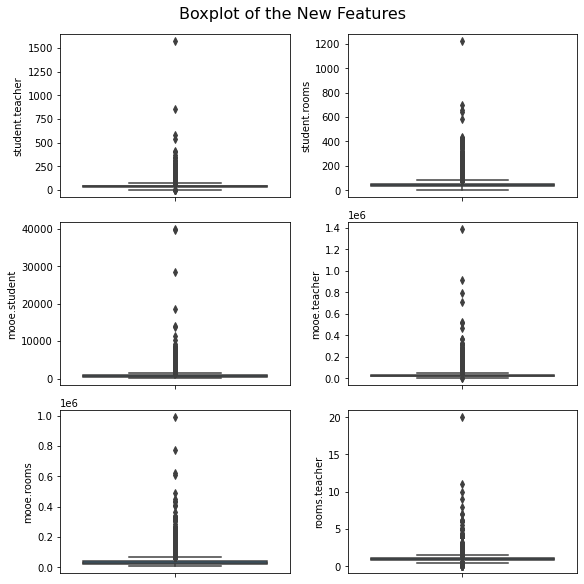

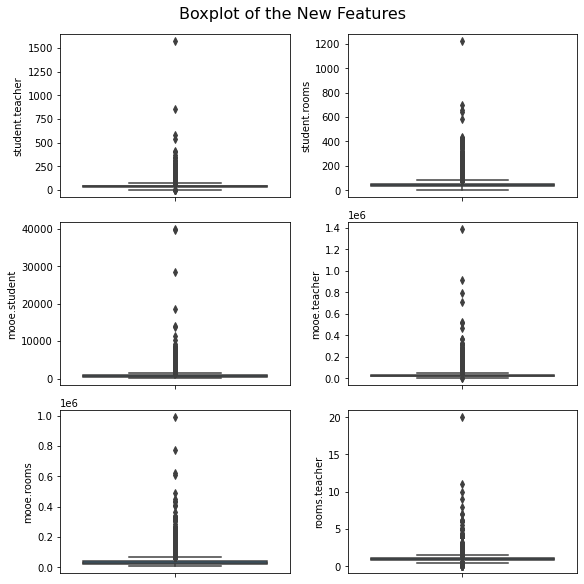

In [52]:
#we will look into the distribution of the new features
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8,8),  constrained_layout=True)

sns.boxplot(ax=axes[0, 0], data=school_newf, y='student.teacher')
sns.boxplot(ax=axes[0, 1], data=school_newf, y='student.rooms')
sns.boxplot(ax=axes[1, 0], data=school_newf, y='mooe.student')
sns.boxplot(ax=axes[1, 1], data=school_newf, y='mooe.teacher')
sns.boxplot(ax=axes[2, 0], data=school_newf, y='mooe.rooms')
sns.boxplot(ax=axes[2, 1], data=school_newf, y='rooms.teacher')

fig.suptitle('Boxplot of the New Features', fontsize=16)
plt.show()

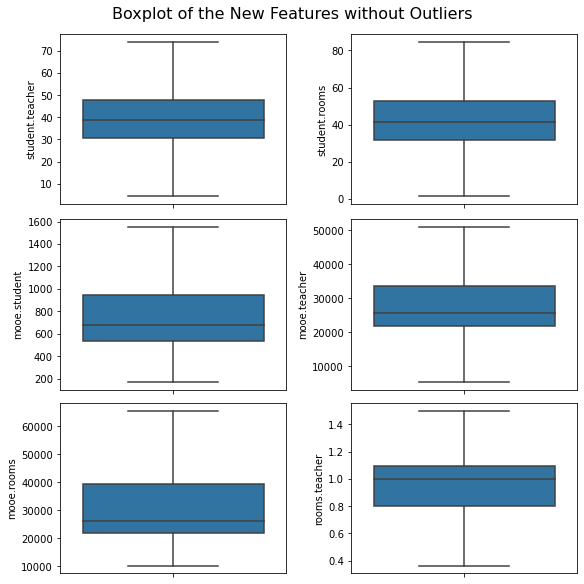

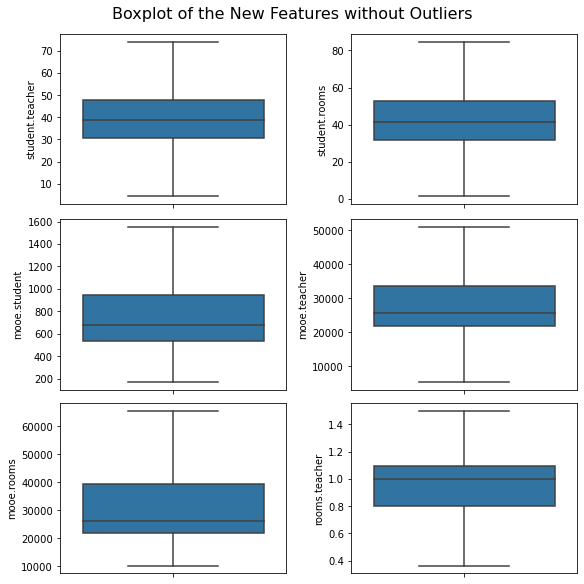

In [53]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8,8),  constrained_layout=True)

sns.boxplot(ax=axes[0, 0], data=school_newf, y='student.teacher', showfliers = False)
sns.boxplot(ax=axes[0, 1], data=school_newf, y='student.rooms', showfliers = False)
sns.boxplot(ax=axes[1, 0], data=school_newf, y='mooe.student', showfliers = False)
sns.boxplot(ax=axes[1, 1], data=school_newf, y='mooe.teacher', showfliers = False)
sns.boxplot(ax=axes[2, 0], data=school_newf, y='mooe.rooms', showfliers = False)
sns.boxplot(ax=axes[2, 1], data=school_newf, y='rooms.teacher', showfliers = False)

fig.suptitle('Boxplot of the New Features without Outliers', fontsize=16)
plt.show()

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

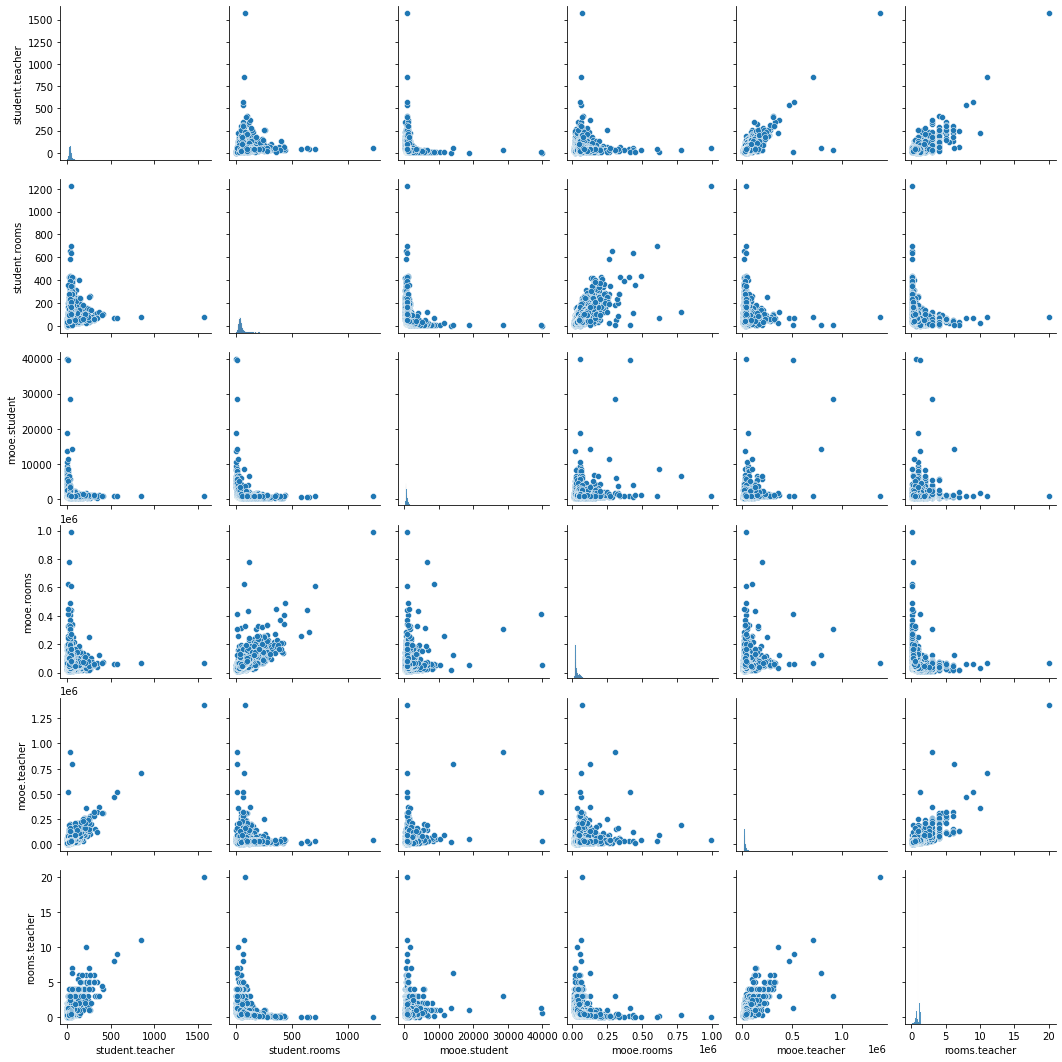

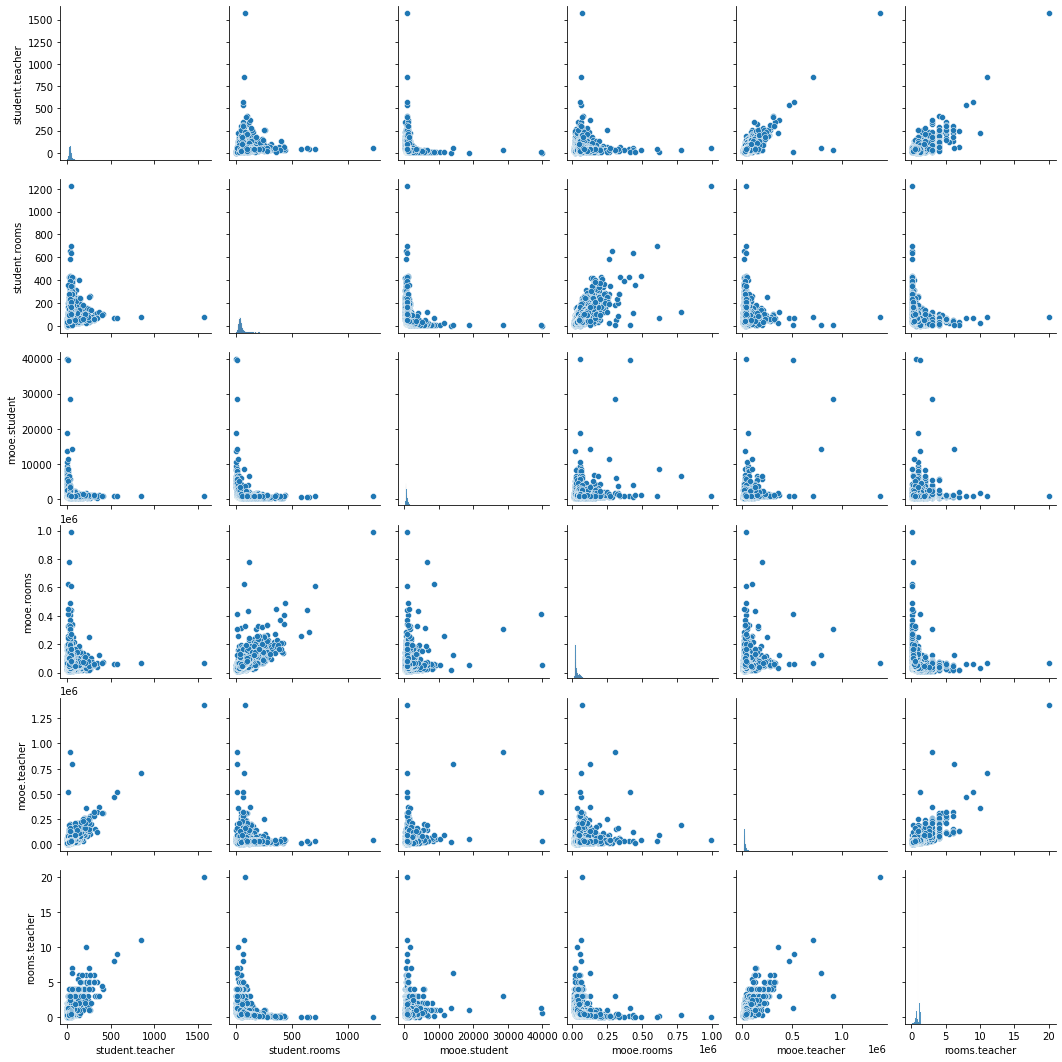

In [54]:
#pairwise scatter plot for the new variables
plt.figure(figsize=(10,8))

sns.pairplot(vars = ['student.teacher', 'student.rooms', 'mooe.student', 'mooe.rooms', 'mooe.teacher','rooms.teacher'], data = school_newf)

plt.show()

12,13,14,23,24,34
12.13.14
12.13.23
12.13.24
12.13.34
13,14,23


## Remove the outliers

In [55]:
#creating school_merged5 which is a dataset minus the outliers
school_newfnool=school_newf.copy()

In [56]:
# Removing (statistical) outliers for Amount
Q1 = school_newfnool['student.teacher'].quantile(0.25)
Q3 = school_newfnool['student.teacher'].quantile(0.75)
IQR = Q3 - Q1
school_newfnool = (school_newfnool[(school_newfnool['student.teacher'] >= Q1 - 1.5*IQR) & 
                           (school_newfnool['student.teacher'] <= Q3 + 1.5*IQR)])

In [57]:
# Removing (statistical) outliers for Amount
Q1 = school_newfnool['student.rooms'].quantile(0.25)
Q3 = school_newfnool['student.rooms'].quantile(0.75)
IQR = Q3 - Q1
school_newfnool = (school_newfnool[(school_newfnool['student.rooms'] >= Q1 - 1.5*IQR) & 
                           (school_newfnool['student.rooms'] <= Q3 + 1.5*IQR)])

In [58]:
# Removing (statistical) outliers for Amount
Q1 = school_newfnool['mooe.student'].quantile(0.25)
Q3 = school_newfnool['mooe.student'].quantile(0.75)
IQR = Q3 - Q1
school_newfnool = (school_newfnool[(school_newfnool['mooe.student'] >= Q1 - 1.5*IQR) & 
                           (school_newfnool['mooe.student'] <= Q3 + 1.5*IQR)])

In [59]:
# Removing (statistical) outliers for Amount
Q1 = school_newfnool['mooe.teacher'].quantile(0.25)
Q3 = school_newfnool['mooe.teacher'].quantile(0.75)
IQR = Q3 - Q1
school_newfnool = (school_newfnool[(school_newfnool['mooe.teacher'] >= Q1 - 1.5*IQR) & 
                           (school_newfnool['mooe.teacher'] <= Q3 + 1.5*IQR)])

In [60]:
# Removing (statistical) outliers for Amount
Q1 = school_newfnool['mooe.rooms'].quantile(0.25)
Q3 = school_newfnool['mooe.rooms'].quantile(0.75)
IQR = Q3 - Q1
school_newfnool = (school_newfnool[(school_newfnool['mooe.rooms'] >= Q1 - 1.5*IQR) & 
                           (school_newfnool['mooe.rooms'] <= Q3 + 1.5*IQR)])

In [61]:
# Removing (statistical) outliers for Amount
Q1 = school_newfnool['rooms.teacher'].quantile(0.25)
Q3 = school_newfnool['rooms.teacher'].quantile(0.75)
IQR = Q3 - Q1
school_newfnool = (school_newfnool[(school_newfnool['rooms.teacher'] >= Q1 - 1.5*IQR) & 
                           (school_newfnool['rooms.teacher'] <= Q3 + 1.5*IQR)])

### Visualize

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

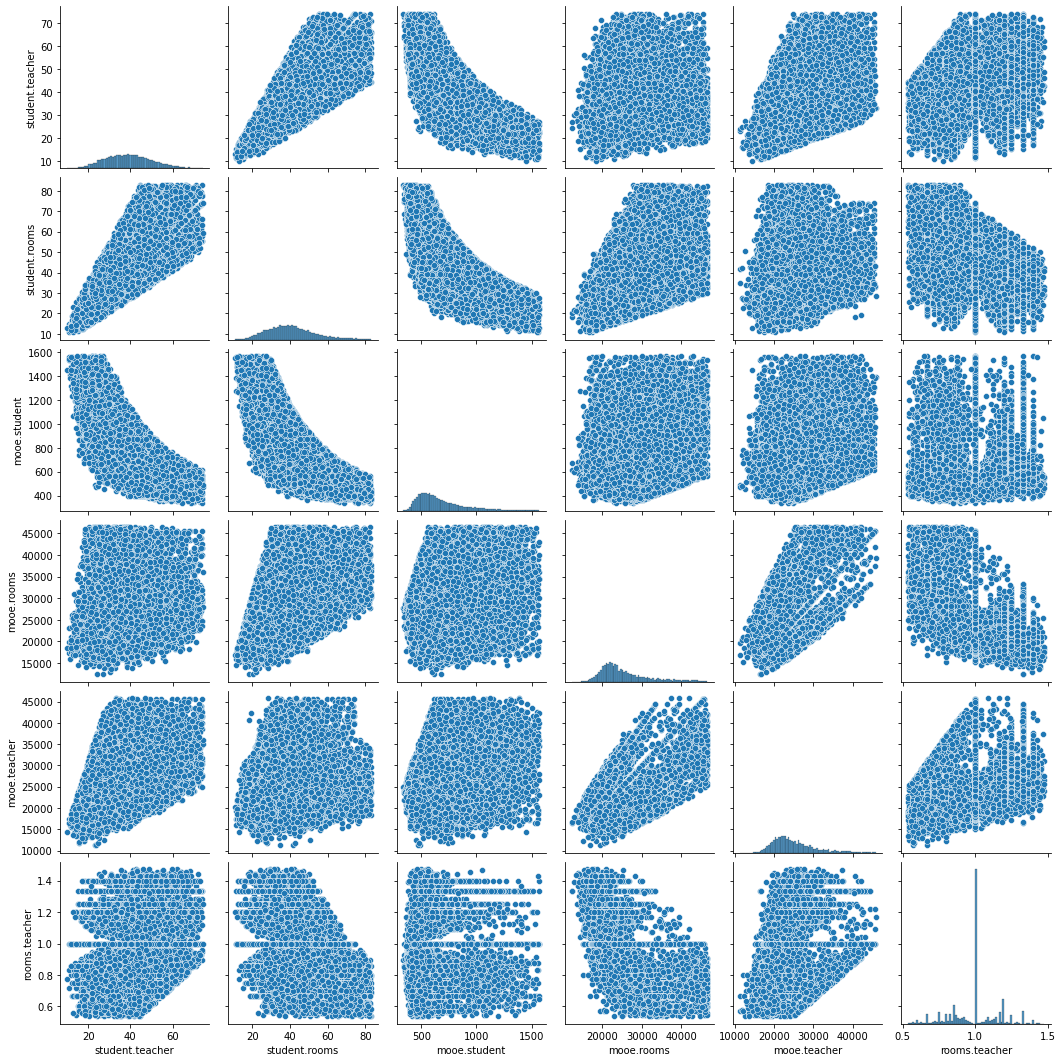

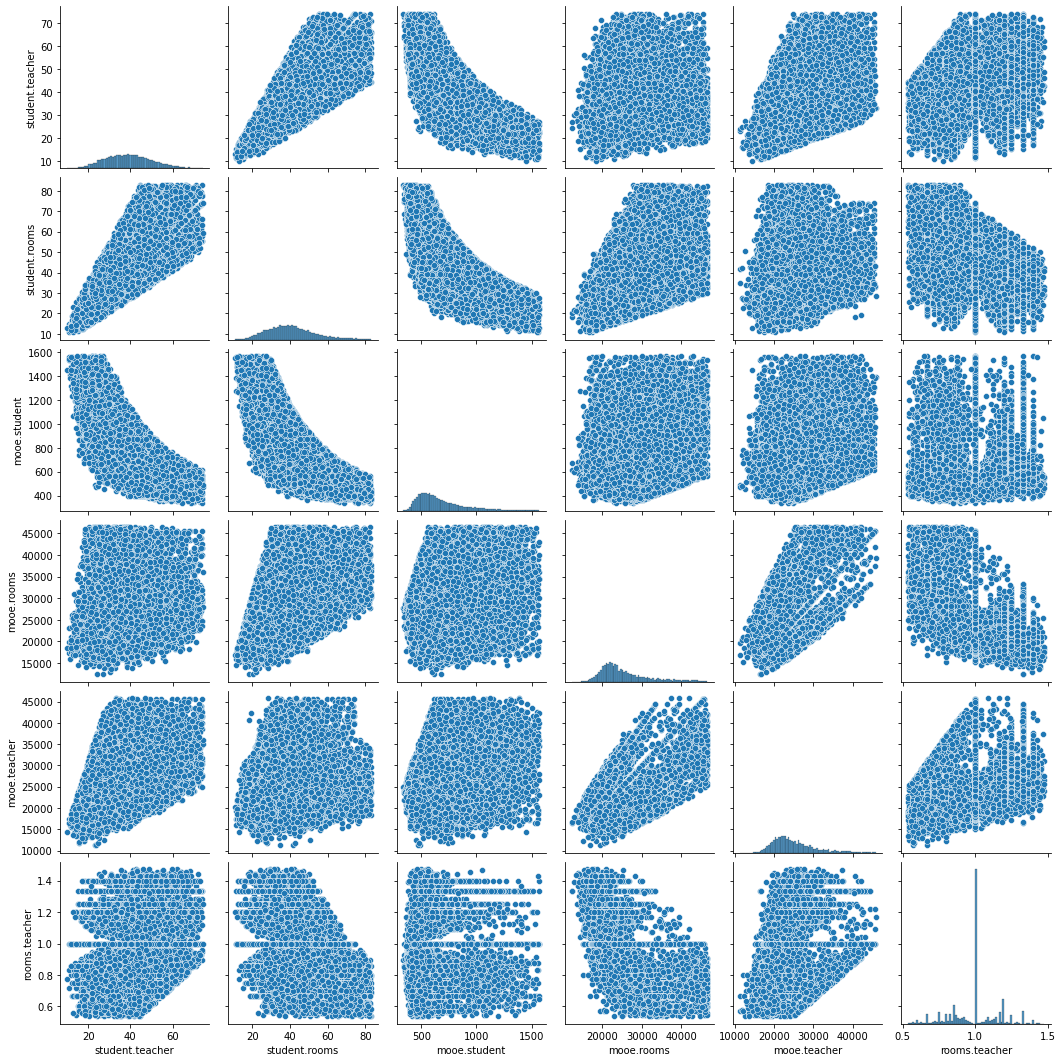

In [62]:
#pairwise scatter plot for the new variables
plt.figure(figsize=(10,8))

sns.pairplot(vars = ['student.teacher', 'student.rooms', 'mooe.student', 'mooe.rooms', 'mooe.teacher','rooms.teacher'], data = school_newfnool)

plt.show()

3D Visualization

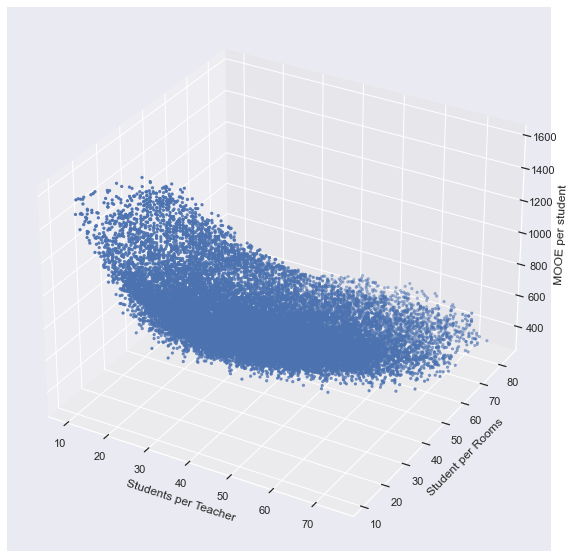

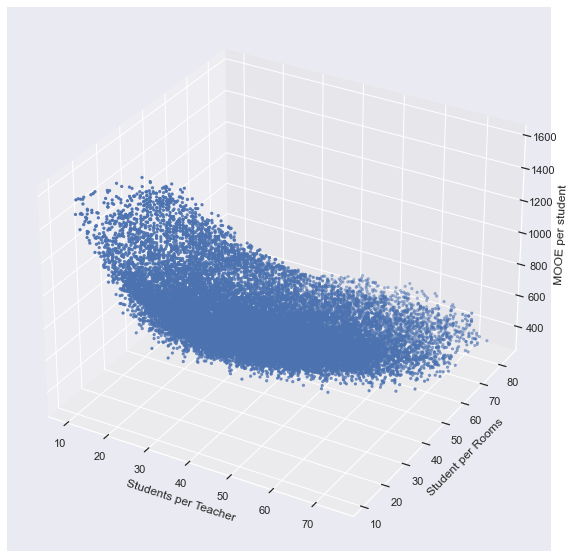

In [63]:
sns.set(style = "darkgrid")

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection = '3d')

x = school_newfnool['student.teacher']
y = school_newfnool['student.rooms']
z = school_newfnool['mooe.student']

ax.set_xlabel("Students per Teacher")
ax.set_ylabel("Student per Rooms")
ax.set_zlabel("MOOE per student")

ax.scatter(x, y, z, s=5)

plt.show()

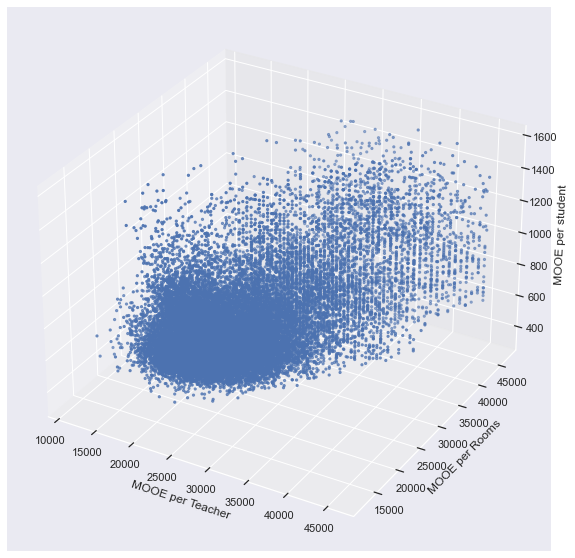

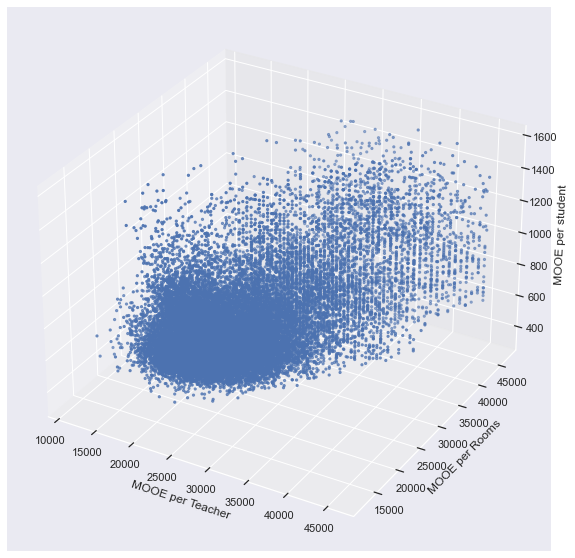

In [64]:
sns.set(style = "darkgrid")

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection = '3d')

x = school_newfnool['mooe.teacher']
y = school_newfnool['mooe.rooms']
z = school_newfnool['mooe.student']

ax.set_xlabel("MOOE per Teacher")
ax.set_ylabel("MOOE per Rooms")
ax.set_zlabel("MOOE per student")

ax.scatter(x, y, z, s=5)

plt.show()

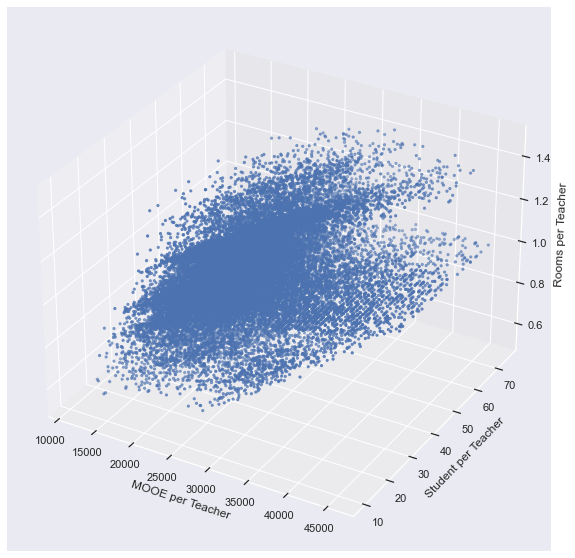

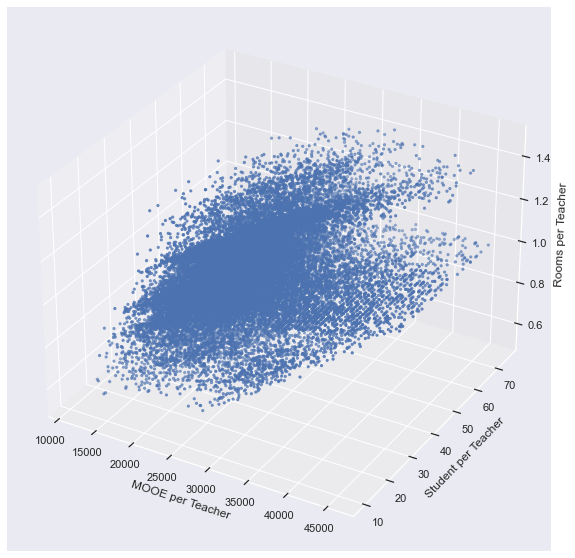

In [65]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection = '3d')

x = school_newfnool['mooe.teacher']
y = school_newfnool['student.teacher']
z = school_newfnool['rooms.teacher']

ax.set_xlabel("MOOE per Teacher")
ax.set_ylabel("Student per Teacher")
ax.set_zlabel("Rooms per Teacher")

ax.scatter(x, y, z, s=5)

plt.show()

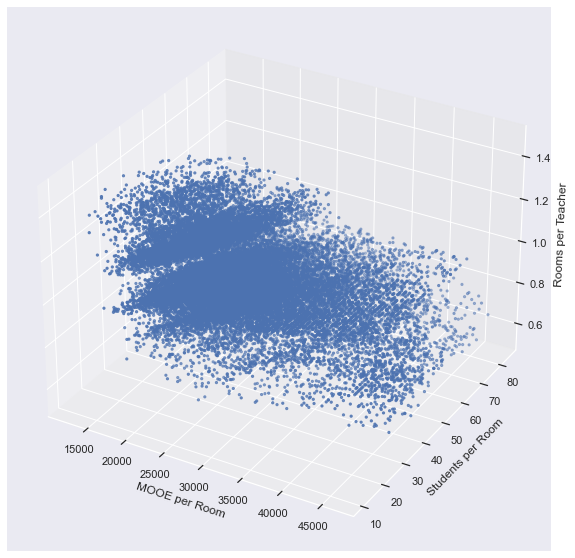

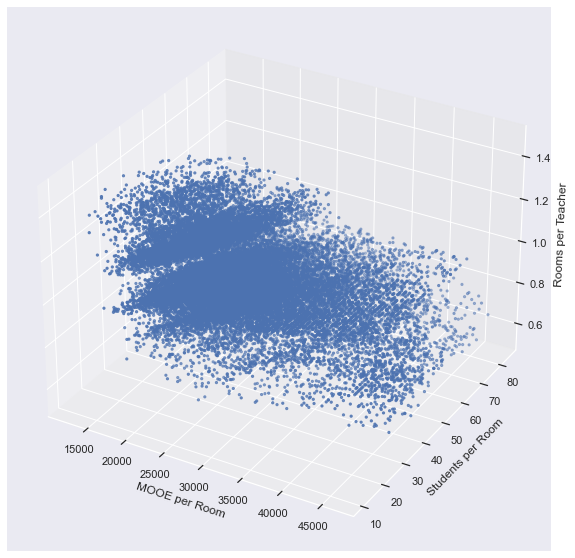

In [66]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection = '3d')

x = school_newfnool['mooe.rooms']
y = school_newfnool['student.rooms']
z = school_newfnool['rooms.teacher']

ax.set_xlabel("MOOE per Room")
ax.set_ylabel("Students per Room")
ax.set_zlabel("Rooms per Teacher")

ax.scatter(x, y, z, s=5)

plt.show()

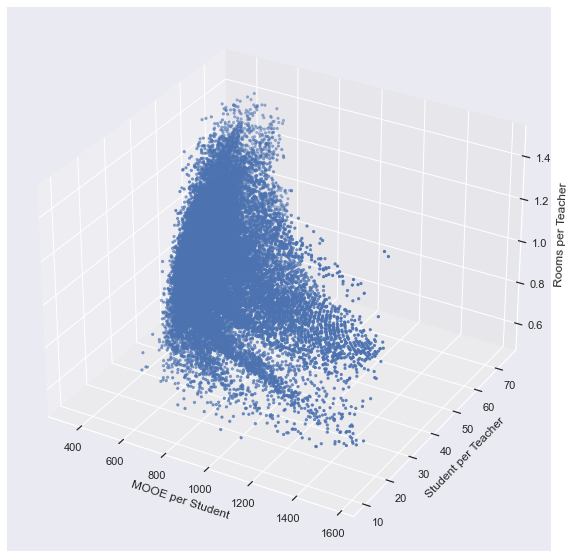

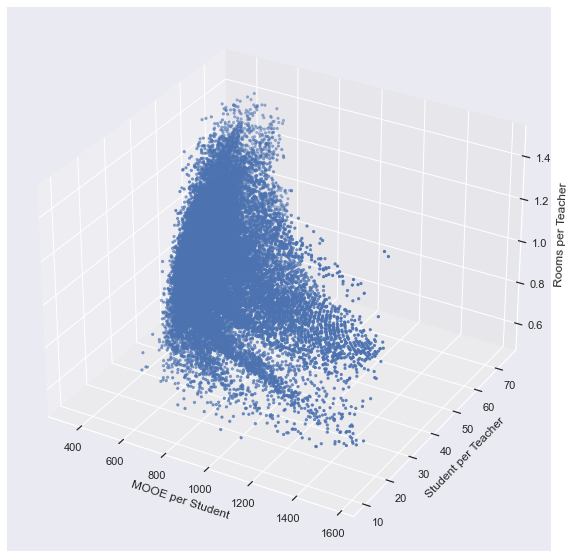

In [67]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection = '3d')

x = school_newfnool['mooe.student']
y = school_newfnool['student.teacher']
z = school_newfnool['rooms.teacher']

ax.set_xlabel("MOOE per Student")
ax.set_ylabel("Student per Teacher")
ax.set_zlabel("Rooms per Teacher")

ax.scatter(x, y, z, s=5)

plt.show()